# Examen Container

## Part 0 Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score, confusion_matrix, mean_squared_error, r2_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve
from sklearn.model_selection import learning_curve
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from mlxtend.plotting import plot_decision_regions
import missingno as msno
import dtreeviz
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB # modele d'exemple a modifier
import pandas as pd
import pickle


## Part 1 : Data Exploration

In [2]:
data = pd.read_csv('data/data_train_diabetes_health_indicators.csv')
data['Diabetes_012'] = data['Diabetes_012'].astype(int)

In [3]:
data.columns #check my features

Index(['Unnamed: 0', 'Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income'],
      dtype='object')

In [4]:
# On enleve la colonne unnamed (c'est l'ancien index)
data.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
data.head()

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0             2       1       1.0          1  32.0     1.0     0.0   
1             0       0       1.0          1  28.0     0.0     0.0   
2             0       0       1.0          1  24.0     1.0     0.0   
3             2       1       1.0          1  38.0     0.0     0.0   
4             0       0       1.0          1  30.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   1.0             1       1  ...              1   
1                   0.0             0       0  ...              1   
2                   0.0             1       0  ...              1   
3                   0.0             1       0  ...              1   
4                   0.0             0       0  ...              0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  \
0          0.0      2.0      15.0       0.0       0.0    1    7        6.0   
1          0.0      4.0       4.0      30.0       0.0    0   10        6.0   
2          0.0      2.0       0.0       0.0       0.0    0   12        5.0   
3          0.0      3.0       0.0       0.0       0.0    1    7        6.0   
4          1.0      4.0      10.0       0.0       0.0    0    5        3.0   

   Income  
0     6.0  
1     7.0  
2     6.0  
3     8.0  
4     7.0  

[5 rows x 22 columns]

In [6]:
#vis features and samples taille
data.shape

(47276, 22)

In [7]:
data.describe()

Diabetes_012        HighBP      HighChol     CholCheck           BMI  \
count  47276.000000  47276.000000  47276.000000  47276.000000  47276.000000   
mean       0.305800      0.419325      0.401980      0.964337     28.939081   
std        0.703757      0.493454      0.490303      0.185450      6.562661   
min        0.000000      0.000000      0.000000      0.000000     12.000000   
25%        0.000000      0.000000      0.000000      1.000000     24.000000   
50%        0.000000      0.000000      0.000000      1.000000     28.000000   
75%        0.000000      1.000000      1.000000      1.000000     32.000000   
max        2.000000      1.000000      1.000000      1.000000     95.000000   

             Smoker        Stroke  HeartDiseaseorAttack  PhysActivity  \
count  47276.000000  47276.000000          47276.000000  47276.000000   
mean       0.408114      0.038265              0.085752      0.781284   
std        0.491490      0.191837              0.280000      0.413380   
min        0.000000      0.000000              0.000000      0.000000   
25%        0.000000      0.000000              0.000000      1.000000   
50%        0.000000      0.000000              0.000000      1.000000   
75%        1.000000      0.000000              0.000000      1.000000   
max        1.000000      1.000000              1.000000      1.000000   

             Fruits  ...  AnyHealthcare   NoDocbcCost       GenHlth  \
count  47276.000000  ...   47276.000000  47276.000000  47276.000000   
mean       0.619807  ...       0.962899      0.062696      2.473560   
std        0.485439  ...       0.189012      0.242417      1.027017   
min        0.000000  ...       0.000000      0.000000      1.000000   
25%        0.000000  ...       1.000000      0.000000      2.000000   
50%        1.000000  ...       1.000000      0.000000      2.000000   
75%        1.000000  ...       1.000000      0.000000      3.000000   
max        1.000000  ...       1.000000      1.000000      5.000000   

           MentHlth      PhysHlth      DiffWalk           Sex           Age  \
count  47276.000000  47276.000000  47276.000000  47276.000000  47276.000000   
mean       3.929245      3.761126      0.152720      0.476986      7.887829   
std        7.861948      8.239428      0.359721      0.499475      3.227736   
min        0.000000      0.000000      0.000000      0.000000      1.000000   
25%        0.000000      0.000000      0.000000      0.000000      5.000000   
50%        0.000000      0.000000      0.000000      0.000000      8.000000   
75%        4.000000      2.000000      0.000000      1.000000     10.000000   
max       30.000000     30.000000      1.000000      1.000000     13.000000   

          Education        Income  
count  47276.000000  47276.000000  
mean       5.142482      6.931191  
std        0.945945      2.376979  
min        1.000000      1.000000  
25%        4.000000      5.000000  
50%        5.000000      7.000000  
75%        6.000000      9.000000  
max        6.000000     11.000000  

[8 rows x 22 columns]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47276 entries, 0 to 47275
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_012          47276 non-null  int32  
 1   HighBP                47276 non-null  int64  
 2   HighChol              47276 non-null  float64
 3   CholCheck             47276 non-null  int64  
 4   BMI                   47276 non-null  float64
 5   Smoker                47276 non-null  float64
 6   Stroke                47276 non-null  float64
 7   HeartDiseaseorAttack  47276 non-null  float64
 8   PhysActivity          47276 non-null  int64  
 9   Fruits                47276 non-null  int64  
 10  Veggies               47276 non-null  int64  
 11  HvyAlcoholConsump     47276 non-null  int64  
 12  AnyHealthcare         47276 non-null  int64  
 13  NoDocbcCost           47276 non-null  float64
 14  GenHlth               47276 non-null  float64
 15  MentHlth           

In [9]:
data.nunique()

Diabetes_012             3
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     74
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                30
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                  11
dtype: int64

## Part 2 : Exploratory data analysis

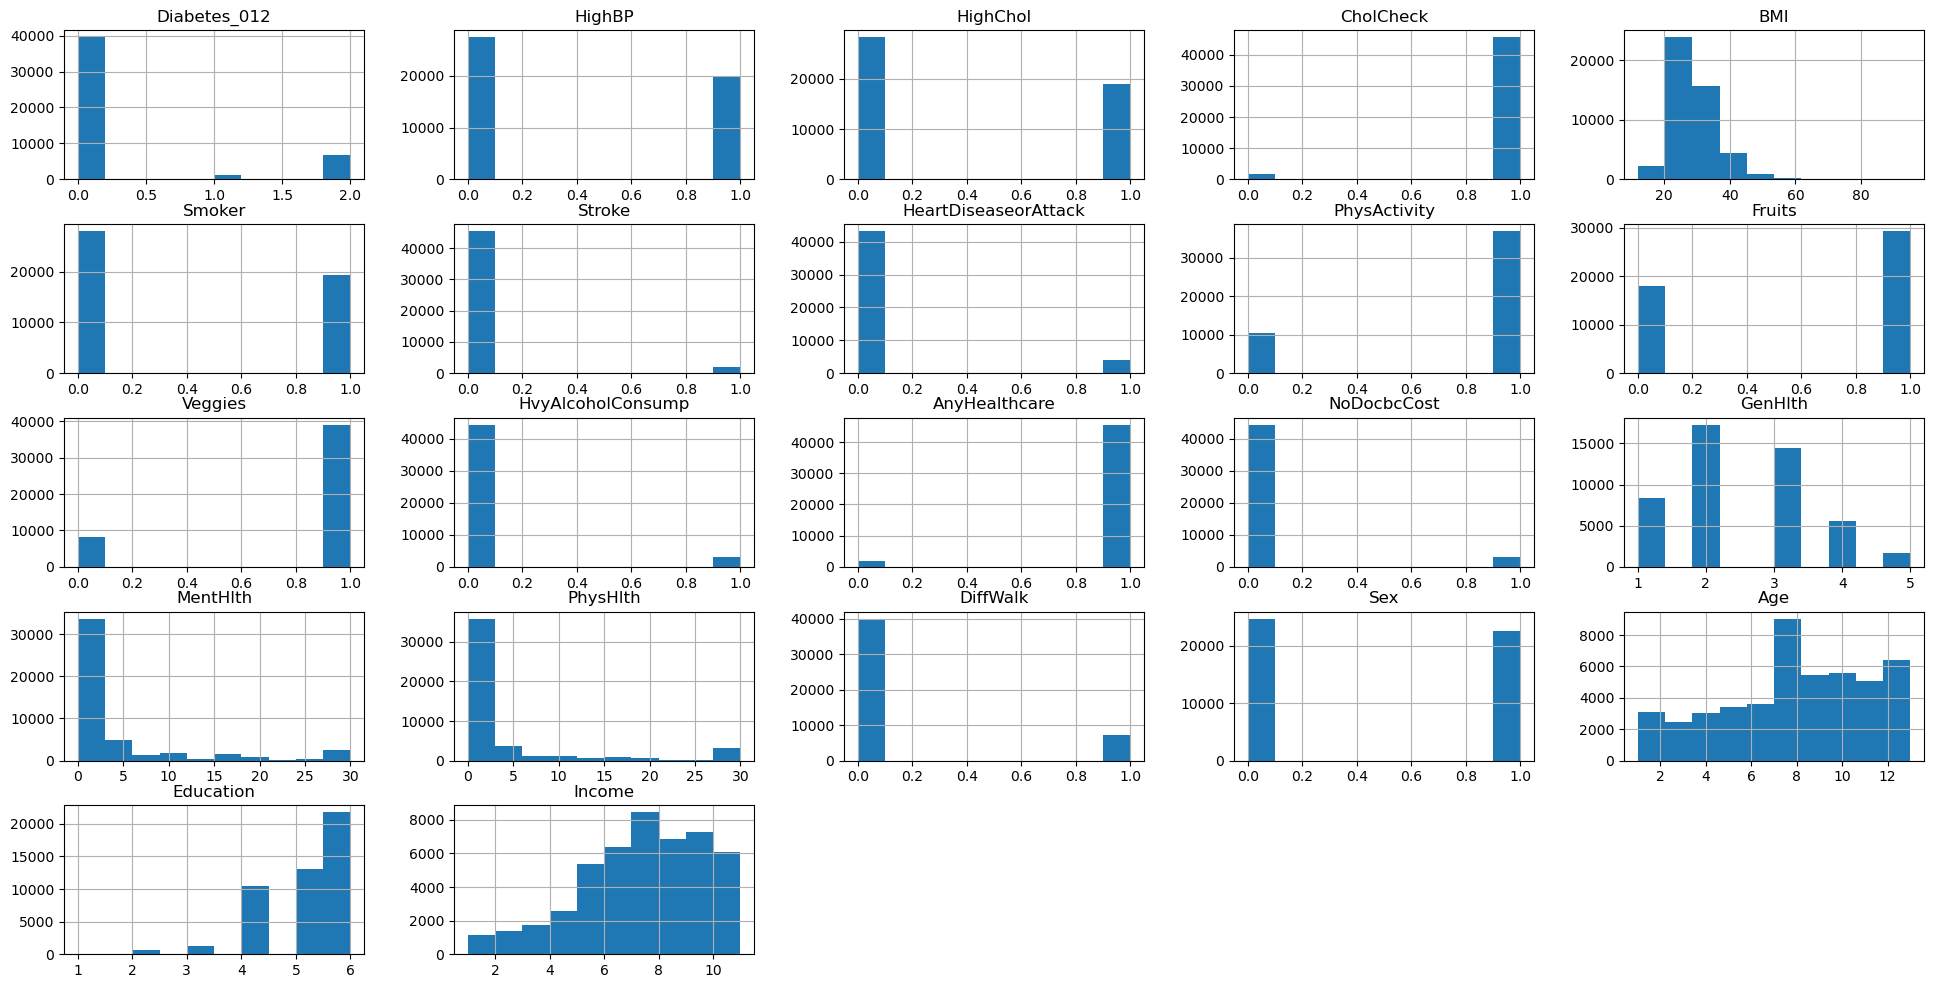

In [10]:
# pour mieux visualiser la distribution des donnees et les nombres de classes
data.hist(figsize=(24,12))
plt.show()
# on voit un desequillibre flagrant dans les feature, chose qui nous pousse a pense aux technique de l'unersampling et l'oversampling

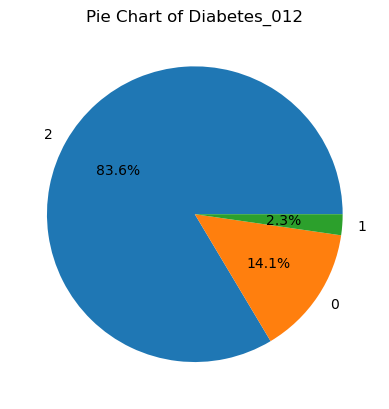

In [10]:
# to check encore mieux le desequillibre, on va faire une pie chart
def plot_pie(df, column):
    plt.pie(df[column].value_counts(), labels=df[column].unique(), autopct='%1.1f%%')
    plt.title(f'Pie Chart of {column}')
    plt.show()

plot_pie(data, 'Diabetes_012')

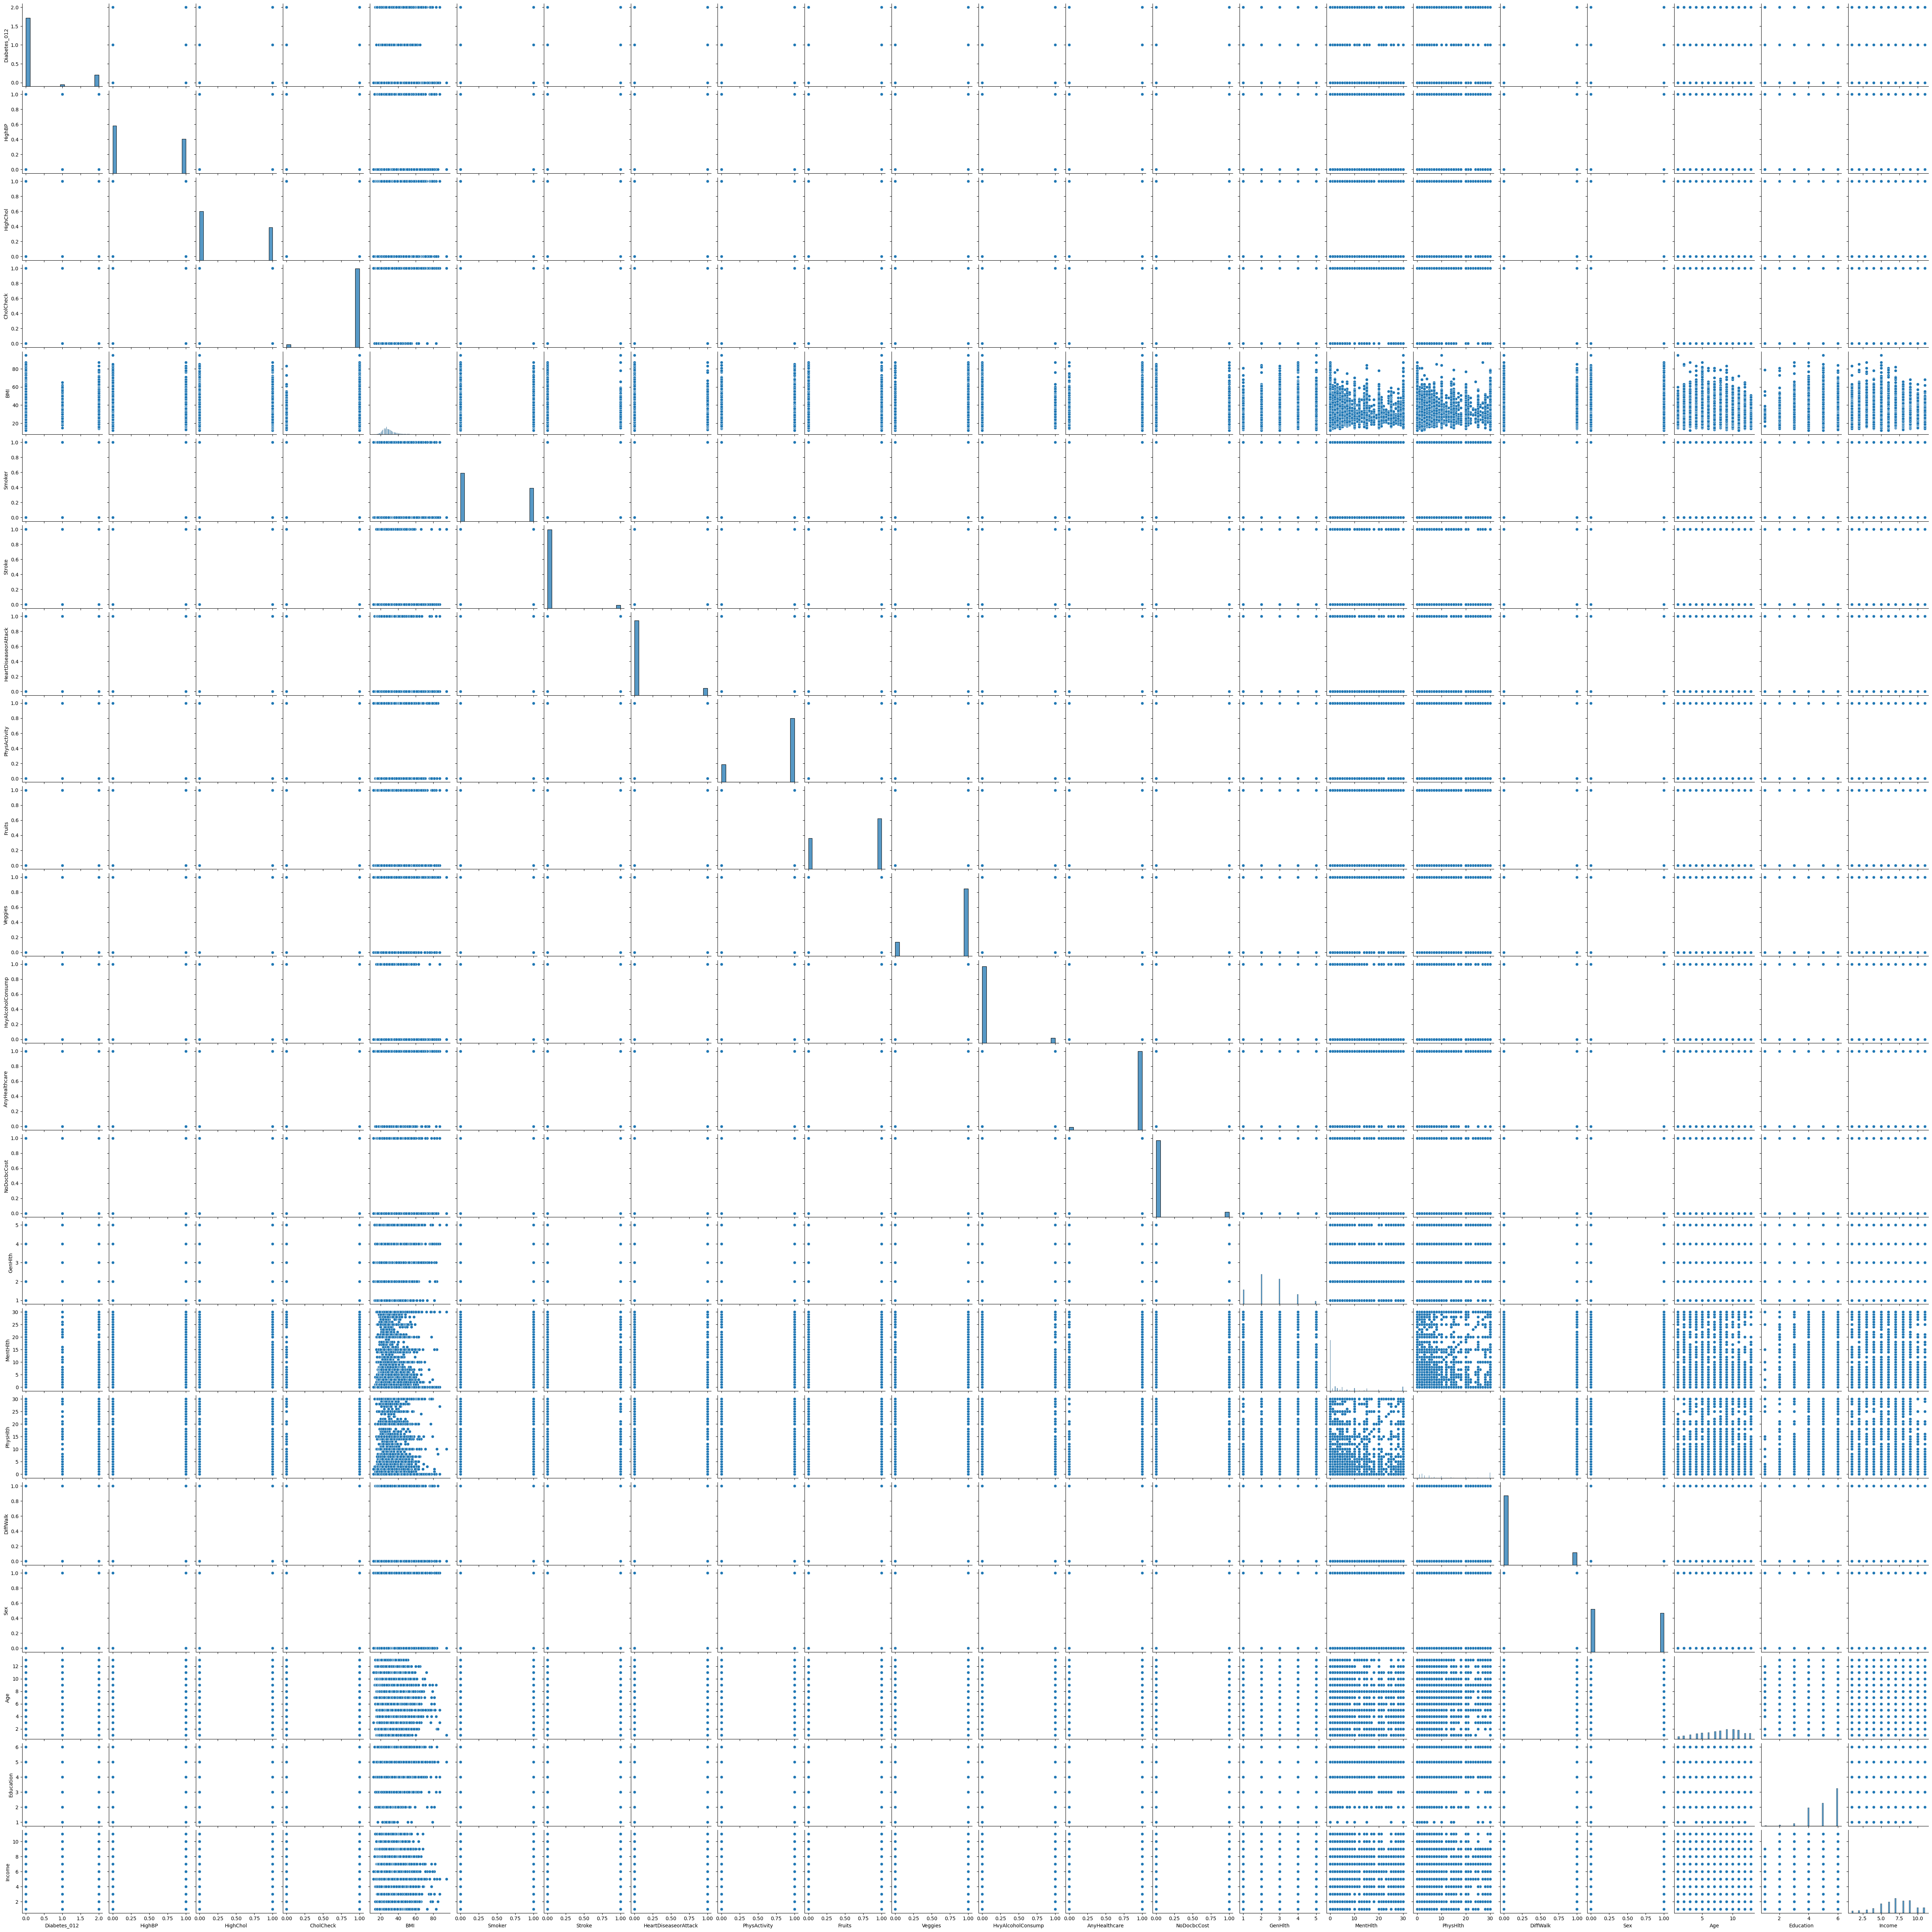

In [21]:
# analyse pair par pair
sns.pairplot(data)
plt.show()

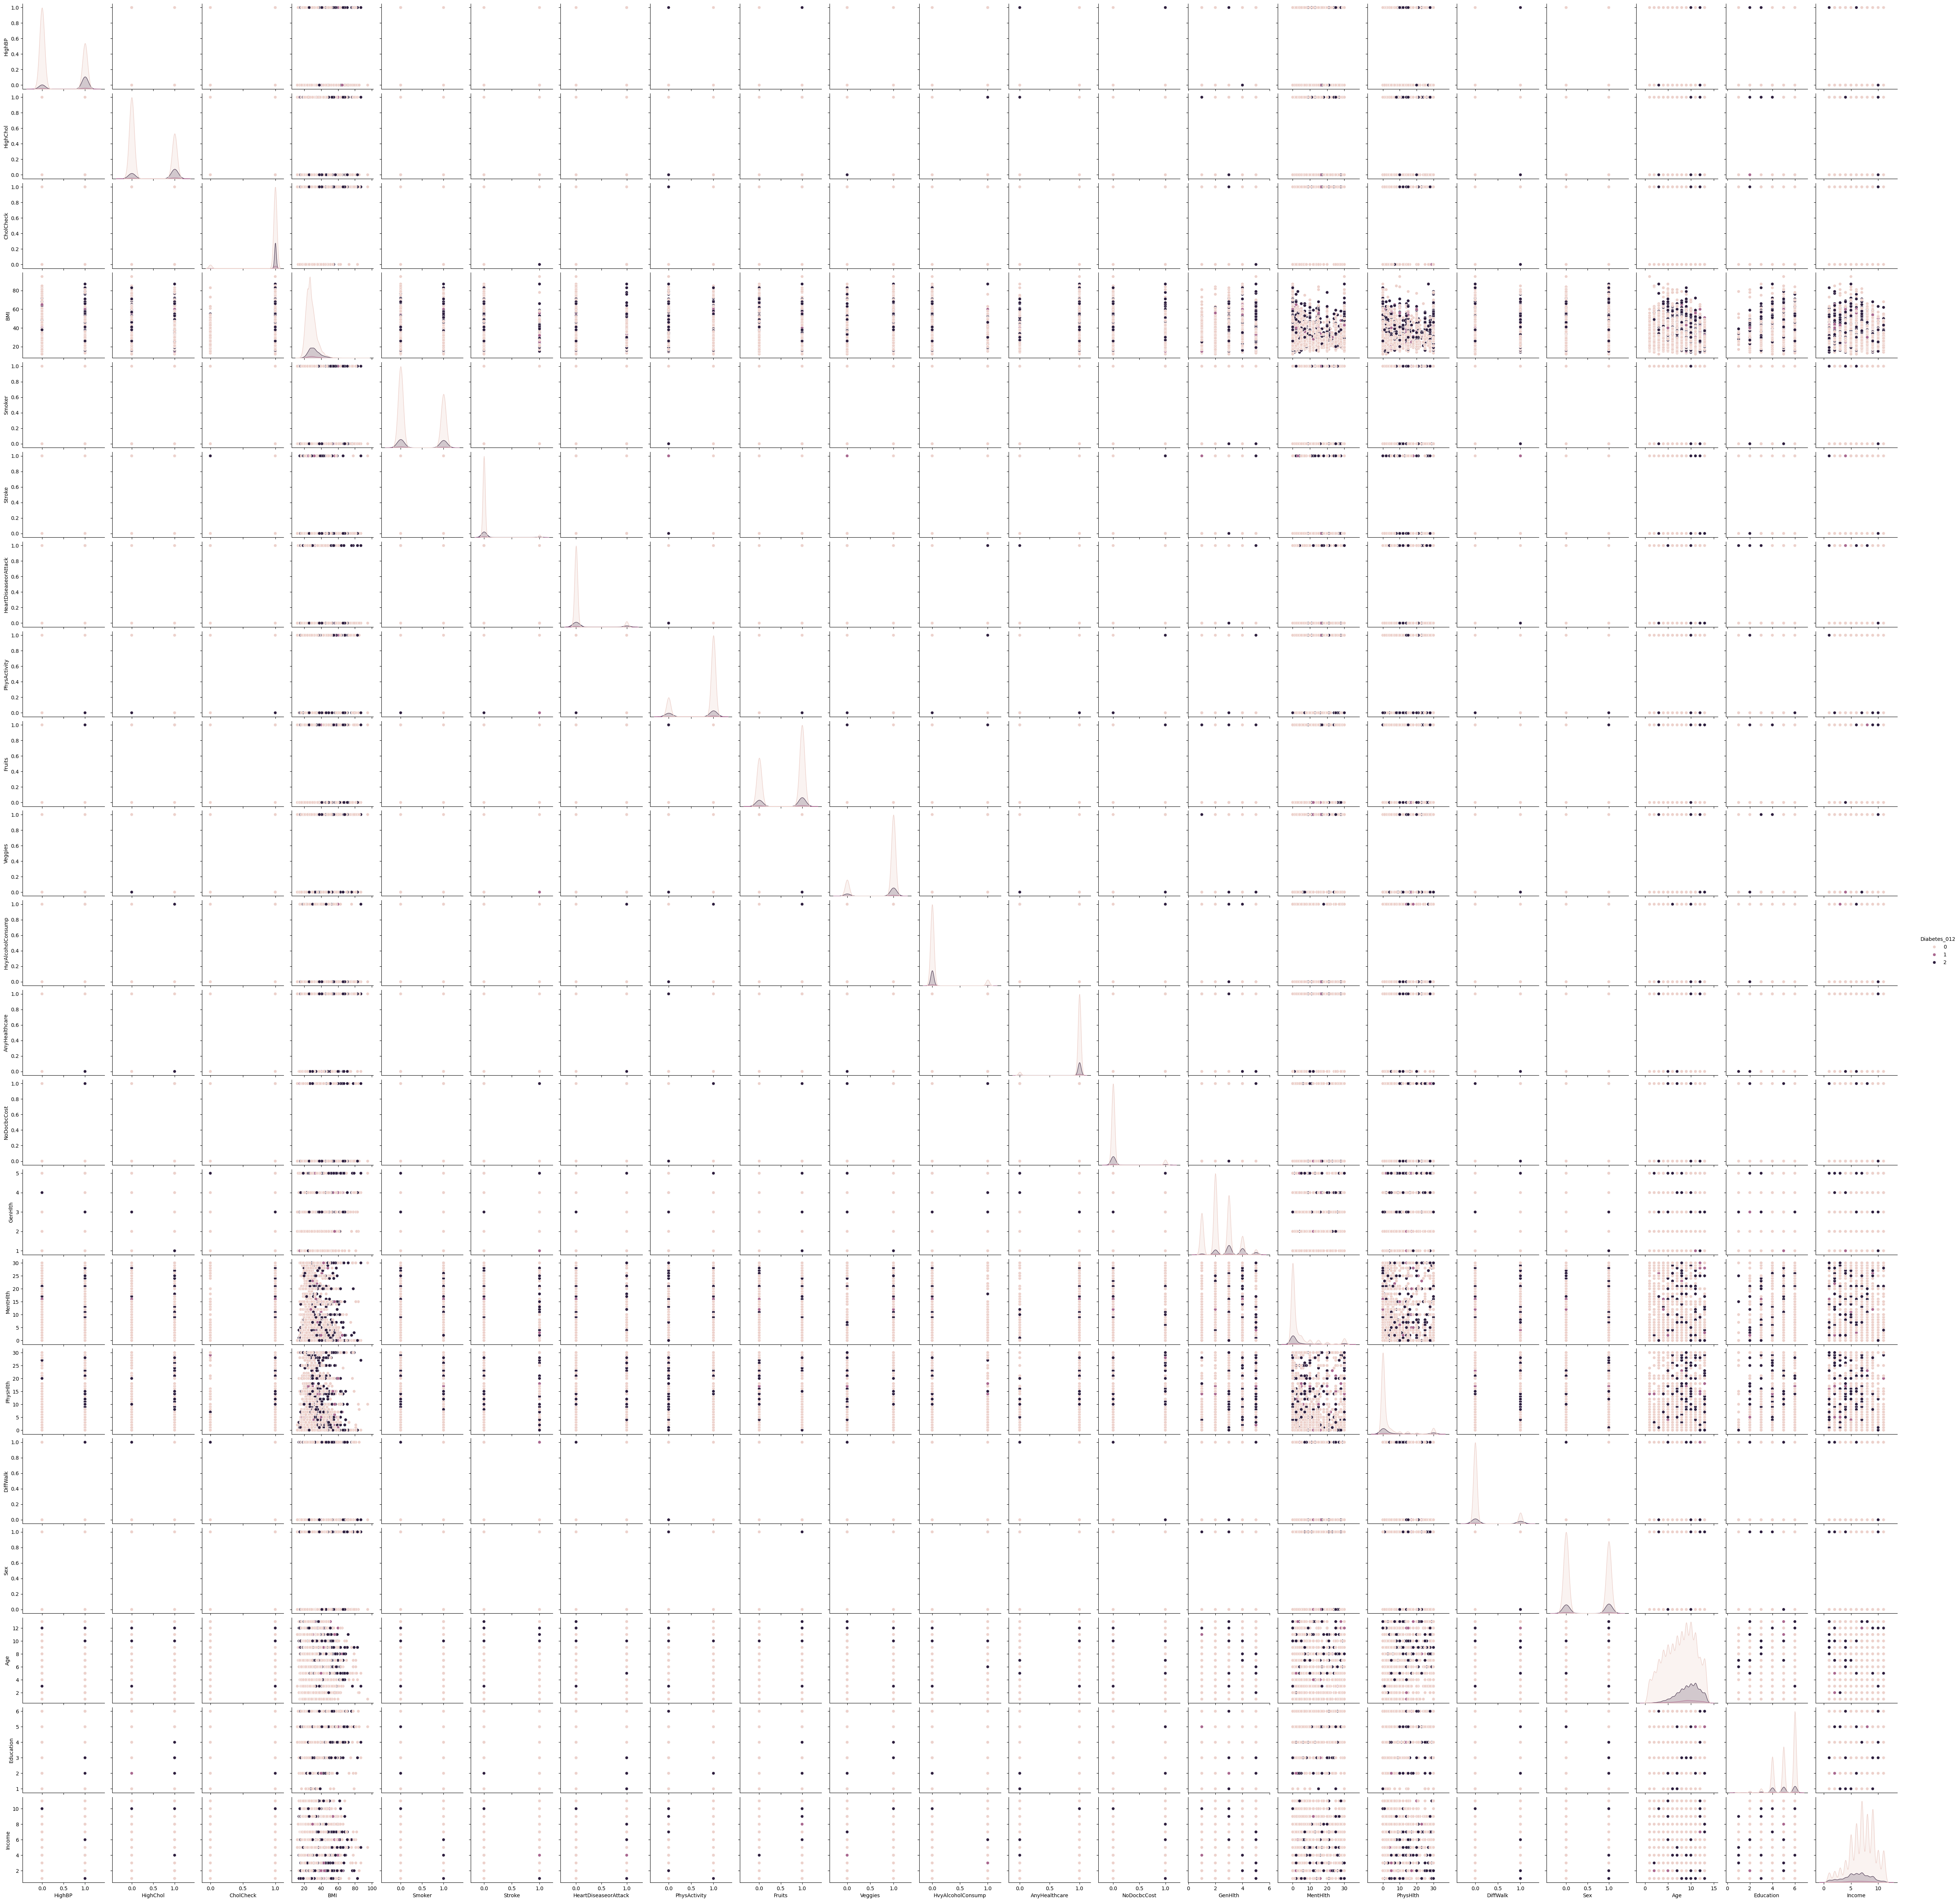

In [22]:
# analyse ;ultivariee, pair par pair avec une variable supplementaire qui est notre target
sns.pairplot(data, hue='Diabetes_012')
plt.show()

In [12]:
# on doit juste telecharger les images des pairplots pour pouvoir interpreter 
#dans notre cas on conclue que y a des features qui ne contribuent pas dans ceratines classes ctr = 0 (si on  voit le pairplot on remarque l'absence de point de la classe)

<Axes: >

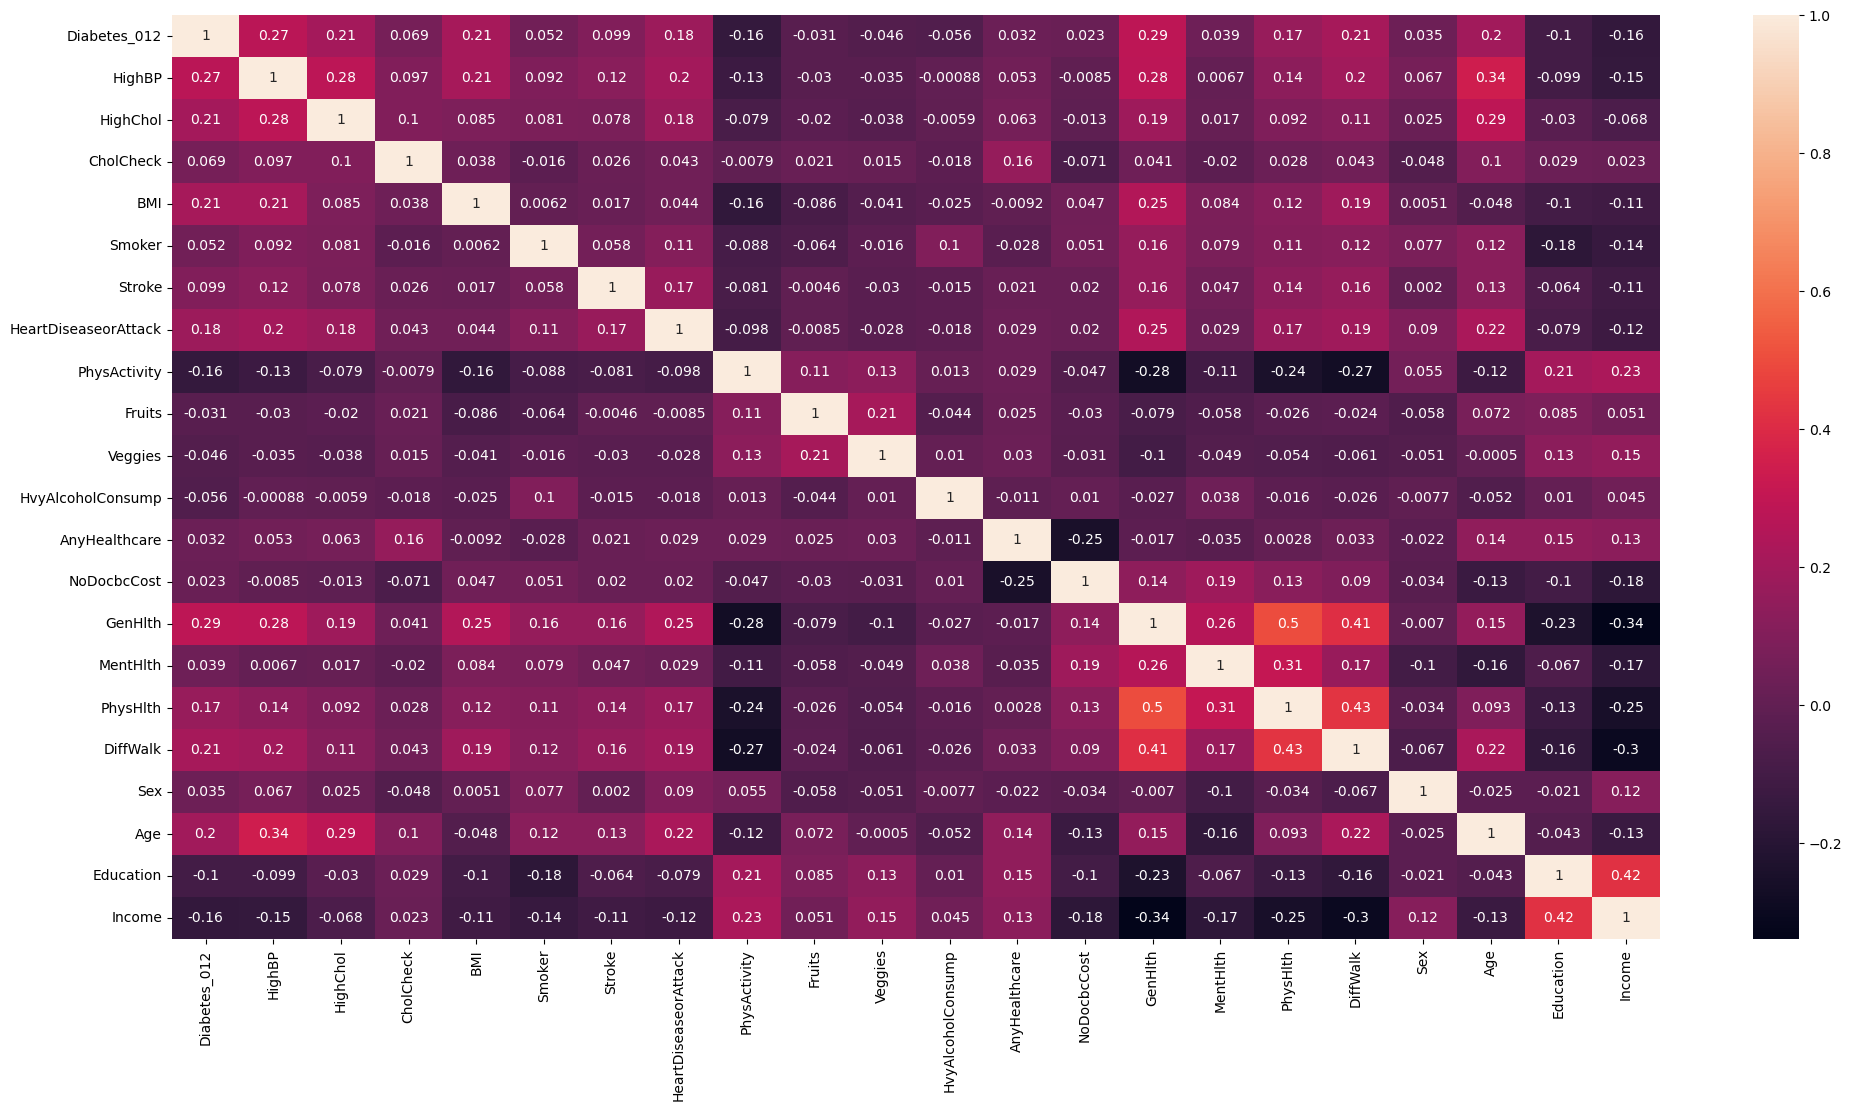

In [11]:
# Check for correlation to study the potential of feature engineering
corr = data.corr()
plt.figure(figsize=(24,12))
sns.heatmap(corr, annot=True)

In [12]:
# Calculer les corrélations avec 'Diabetes_012'
correlations = data.corr()['Diabetes_012']

correlations = correlations[correlations.index != 'Diabetes_012']

threshold = 0.105 * correlations.abs().max()

well_correlated_features = correlations[correlations.abs() > threshold].index

well_correlated_features = well_correlated_features.append(pd.Index(['Diabetes_012']))

removed_features = set(data.columns) - set(well_correlated_features)
print(f"Caractéristiques supprimées : {removed_features}")

data = data[well_correlated_features]


Caractéristiques supprimées : {'NoDocbcCost'}


In [13]:
'''
Donc la on regarde le sens des variables pour voir si vraiment on peut les supprimer : 
NoDocbcCost: Binary variable indicating the absence (1) of presence (0) of doctor visits due to cost. OUI. en plus on la la variable AnyHealthcare: Binary variable indicating the use (1) or non-use (0) of any healthcare services. qui est plus indicative
d'autres peuvent etre affichees si le threshold augmente mais je decide de les garder car elle ont du sens 
'''

"\nDonc la on regarde le sens des variables pour voir si vraiment on peut les supprimer : \nNoDocbcCost: Binary variable indicating the absence (1) of presence (0) of doctor visits due to cost. OUI. en plus on la la variable AnyHealthcare: Binary variable indicating the use (1) or non-use (0) of any healthcare services. qui est plus indicative\nd'autres peuvent etre affichees si le threshold augmente mais je decide de les garder car elle ont du sens \n"

In [14]:
# On fait un qq plot pour voir les distributions, si elle est normal pour une var on peut effectuer des transformations
# les features numerique contient plus que 6 classes and we take off also income because its a level (var discrete)
numerical_cols = [col for col in data.columns if data[col].nunique() > 11]

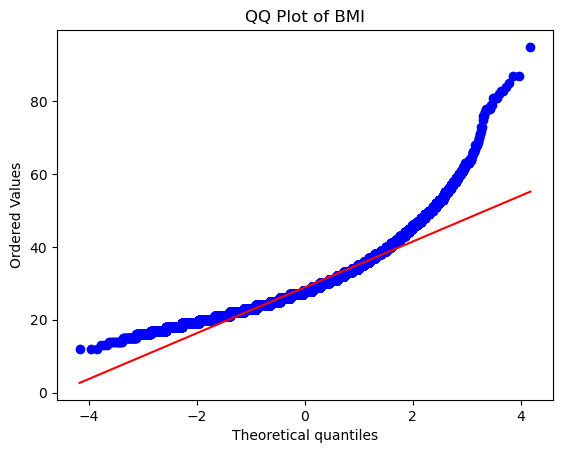

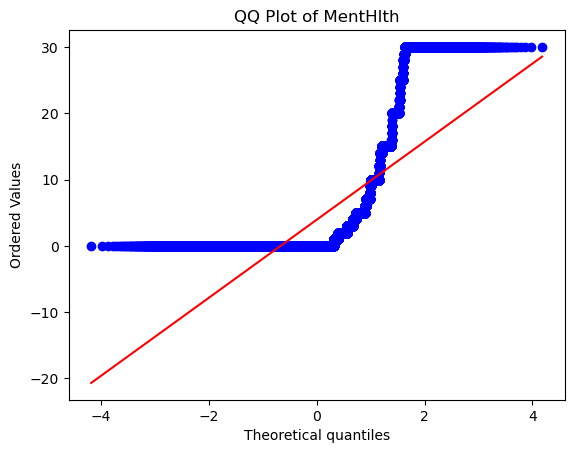

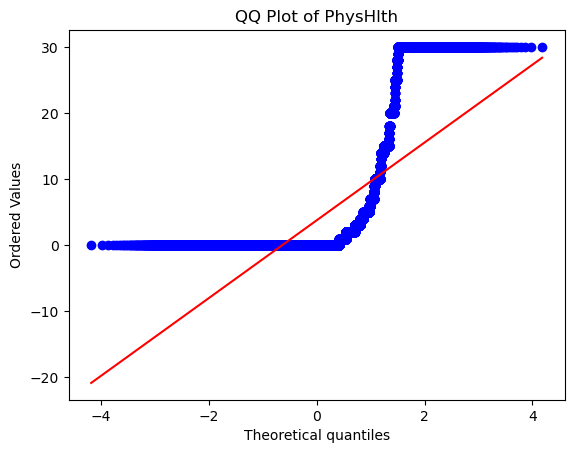

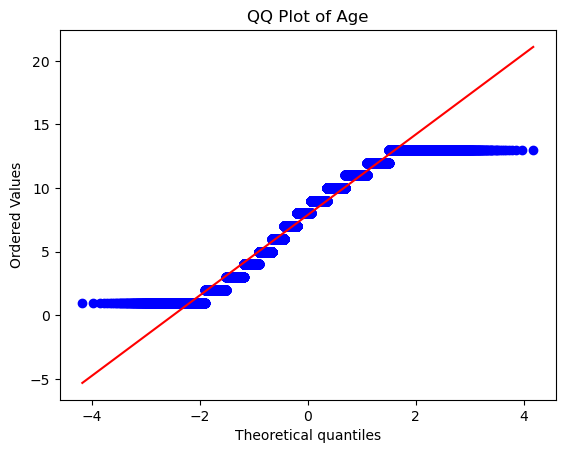

In [17]:
from scipy.stats import probplot

def plot_qq(df, column):
    probplot(df[column], plot=plt)
    plt.title(f'QQ Plot of {column}')
    plt.show()
    
for col in numerical_cols:
    plot_qq(data, col)

In [18]:
# age looks discrete mes c'est quelque chose de continue dans la vraie vie,  le plot ne suit pas laxe rouge donc y a pas de diribution normale, on peut les rendre normal en employant une transformation log par ex, mais non.

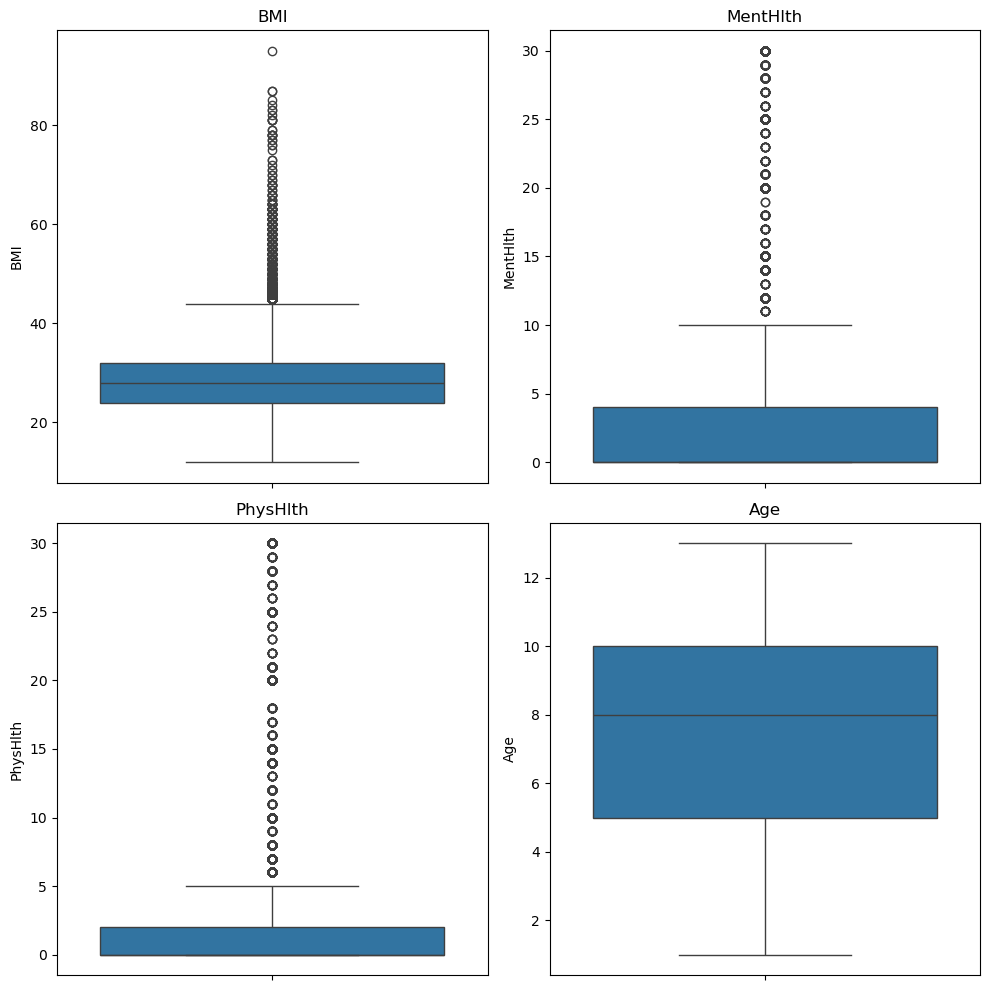

In [15]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10)) #on a 4 features

for i, col in enumerate(numerical_cols):
    r = i // 2
    c = i % 2
    sns.boxplot(data=data[col], ax=axs[r, c])
    axs[r, c].set_title(col)

plt.tight_layout()
plt.show()

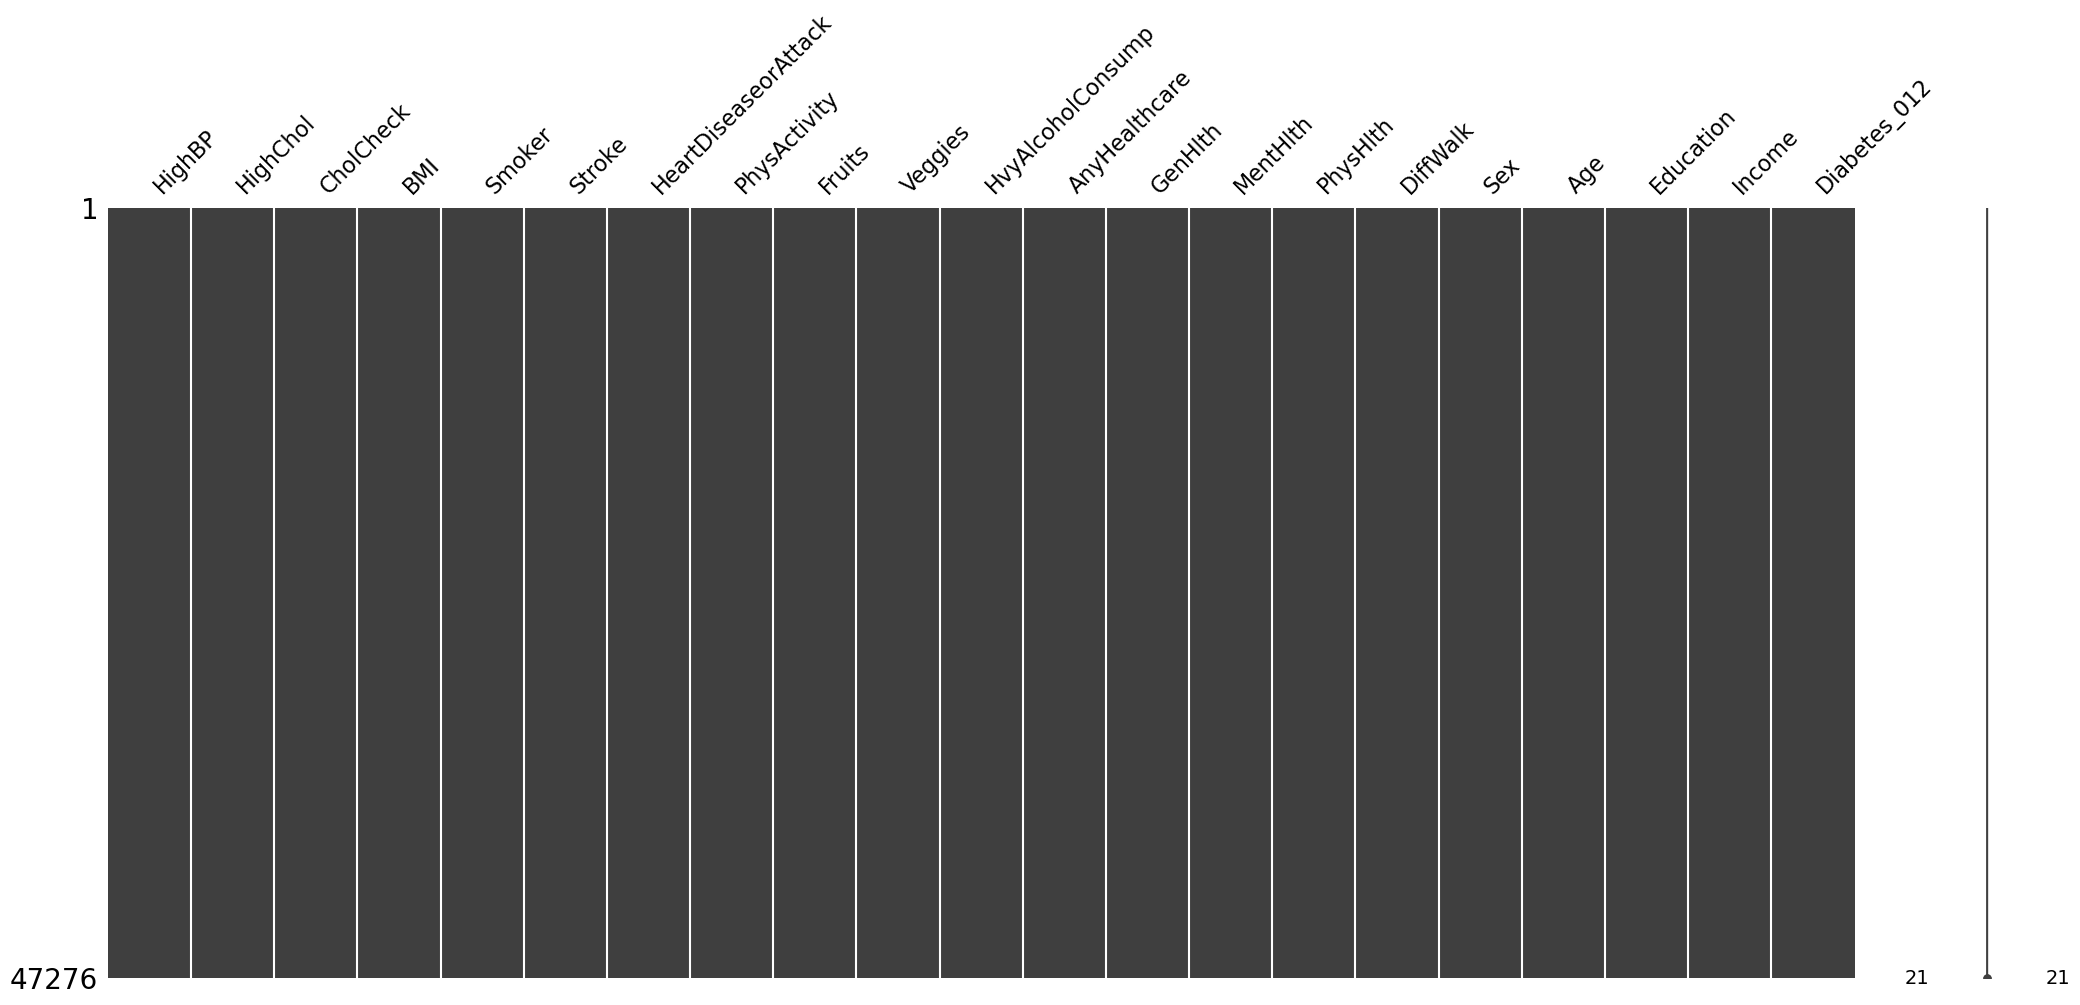

In [20]:
#Missing vals
# on a deja verifier les val manquante y en a pas mais on doit les visualiser psk y en a pas, pas besoin d'imputation
msno.matrix(data)
plt.show()

## Part 3 : Preprocessing

In [21]:
# Categorical vals transformation
# pas besoin de transformation de variables categorielle (dummy or one hot), le dataset est deja traitee

In [16]:
# du coup pour normaliser : on verifie d'abord sil y a un grand ecart entre le min et les max, la reponse est non donc pas besoin de standard scaling
data[numerical_cols].describe()

BMI      MentHlth      PhysHlth           Age
count  47276.000000  47276.000000  47276.000000  47276.000000
mean      28.939081      3.929245      3.761126      7.887829
std        6.562661      7.861948      8.239428      3.227736
min       12.000000      0.000000      0.000000      1.000000
25%       24.000000      0.000000      0.000000      5.000000
50%       28.000000      0.000000      0.000000      8.000000
75%       32.000000      4.000000      2.000000     10.000000
max       95.000000     30.000000     30.000000     13.000000

In [17]:
# mtn on va regarder la possibilite d'enlever les outliers si ceci n'elimine pas l'une de nos classes qui est mal representee
def remove_outliers(data, col, multiplier = 1.5):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    
    IQR = Q3 - Q1
    
    bas = Q1 - multiplier * IQR
    haut = Q3 + multiplier * IQR
    
    data = data[(data[col] >= bas) & (data[col] <= haut)]
    
    return data


Samples des données avant la suppression des outliers : 47276


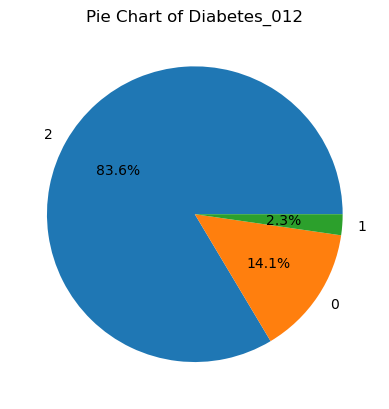

Diabetes_012
0    0.835688
2    0.141488
1    0.022823
Name: proportion, dtype: float64


In [18]:

print(f"Samples des données avant la suppression des outliers : {len(data)}")
plot_pie(data, 'Diabetes_012')
proportions = data['Diabetes_012'].value_counts(normalize=True)
print(proportions)

Samples après la suppression des outliers : 31446


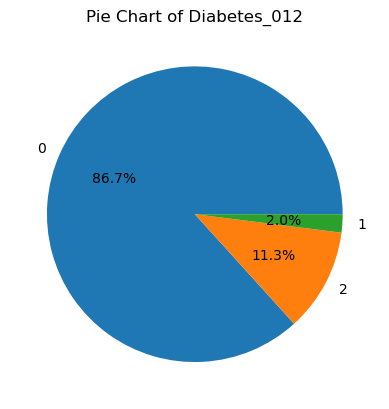

Diabetes_012
0    0.867169
2    0.112860
1    0.019971
Name: proportion, dtype: float64


In [19]:
dataa = data.copy()
for col in numerical_cols:
    dataa = remove_outliers(dataa, col)

print(f"Samples après la suppression des outliers : {len(dataa)}")
plot_pie(dataa, 'Diabetes_012')
proportions = dataa['Diabetes_012'].value_counts(normalize=True)
print(proportions)

In [20]:
#Tres bien, la taille du dataset a diminuee mais on a a peu pres les memes proportions pour chaque classe. On prend dataa mtn
data = dataa
data.head()

HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  HeartDiseaseorAttack  \
2       0       1.0          1  24.0     1.0     0.0                   0.0   
3       1       1.0          1  38.0     0.0     0.0                   0.0   
6       0       0.0          1  23.0     0.0     0.0                   0.0   
7       1       1.0          1  31.0     0.0     0.0                   0.0   
9       1       0.0          1  31.0     0.0     0.0                   0.0   

   PhysActivity  Fruits  Veggies  ...  AnyHealthcare  GenHlth  MentHlth  \
2             1       0        1  ...              1      2.0       0.0   
3             1       0        1  ...              1      3.0       0.0   
6             1       0        1  ...              1      1.0       0.0   
7             1       1        1  ...              1      2.0       0.0   
9             1       1        1  ...              1      2.0       0.0   

   PhysHlth  DiffWalk  Sex  Age  Education  Income  Diabetes_012  
2       0.0       0.0    0   12        5.0     6.0             0  
3       0.0       0.0    1    7        6.0     8.0             2  
6       0.0       0.0    0    5        5.0     9.0             0  
7       0.0       0.0    1    7        6.0     8.0             2  
9       0.0       0.0    0   13        6.0     8.0             0  

[5 rows x 21 columns]